In [7]:
from aif360.datasets import CompasDataset
import warnings
warnings.filterwarnings("ignore")

dataset = CompasDataset()


In [8]:
privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]


Disparate Impact: 0.840
Equal Opportunity Difference: 0.000
False Positive Rate Difference: 0.000


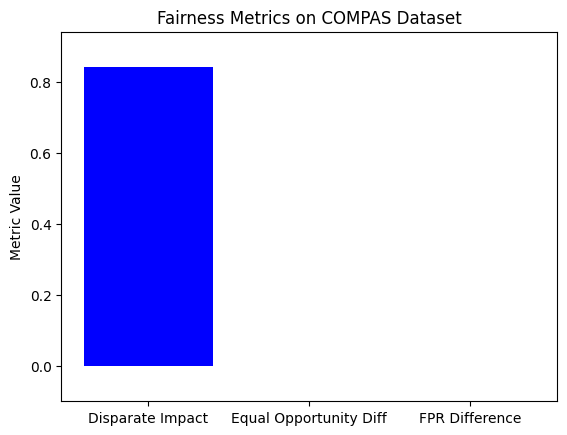

In [9]:
# Imports
from aif360.datasets import CompasDataset
from aif360.metrics import ClassificationMetric
import matplotlib.pyplot as plt

# Load COMPAS dataset
dataset = CompasDataset()

# Define privileged and unprivileged groups
privileged_groups = [{'race': 1}]  # White
unprivileged_groups = [{'race': 0}]  # Non-white

# Suppose 'risk_score' is the predicted score — if not, you can simulate or use 'two_year_recid' as label
# For demo, let's treat labels as predicted outcomes (usually you'd have model preds)
preds = dataset.labels  # Placeholder, replace with actual model preds if available

# Create a dataset copy for predictions
dataset_pred = dataset.copy()
dataset_pred.labels = preds

# Initialize metric object
metric = ClassificationMetric(dataset, dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

# Calculate key metrics
disparate_impact = metric.disparate_impact()
equal_opportunity_diff = metric.equal_opportunity_difference()
false_positive_rate_diff = metric.false_positive_rate_difference()

print(f"Disparate Impact: {disparate_impact:.3f}")
print(f"Equal Opportunity Difference: {equal_opportunity_diff:.3f}")
print(f"False Positive Rate Difference: {false_positive_rate_diff:.3f}")

# Plotting these disparities
metrics = [disparate_impact, equal_opportunity_diff, false_positive_rate_diff]
labels = ['Disparate Impact', 'Equal Opportunity Diff', 'FPR Difference']

plt.bar(labels, metrics, color=['blue', 'orange', 'green'])
plt.title('Fairness Metrics on COMPAS Dataset')
plt.ylabel('Metric Value')
plt.ylim(min(metrics) - 0.1, max(metrics) + 0.1)
plt.show()


In [10]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric

# Define groups again (if needed)
privileged_groups = [{'race': 1}]    # White
unprivileged_groups = [{'race': 0}]  # Non-white

# Original metric
metric_orig = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Original Disparate Impact:", metric_orig.disparate_impact())

# Apply Reweighing to dataset
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
dataset_transf = RW.fit_transform(dataset)

# Metric after reweighing
metric_transf = BinaryLabelDatasetMetric(dataset_transf, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Disparate Impact after Reweighing:", metric_transf.disparate_impact())


Original Disparate Impact: 0.8403836674666473
Disparate Impact after Reweighing: 1.0000000000000002
